In [1]:
import numpy as np
import cv2
import matplotlib as mp

In [2]:
#1. Write a program for intensity transformation of an image using following transformations:

image = cv2.imread('../IMAGES/CLina.jpg', 0)


In [3]:
#Image Negative and identity transformation
def image_Negative_Transformation(image):
    x, y = image.shape
    transformed_image = np.random.randint(0, 255, size = (x, y), dtype = np.uint8)
    transformed_image = 256 - 1 - image
    return transformed_image

def image_Identity_Transformation(image):
    x, y = image.shape
    transformed_image = np.random.randint(0, 255, size = (x, y), dtype = np.uint8)
    transformed_image = image
    return transformed_image

negative_image = image_Negative_Transformation(image)
identity_image = image_Identity_Transformation(image)
cv2.imshow('Original Image', image)
cv2.imshow('Negative Image', negative_image)
cv2.imshow('Identity Image', identity_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#Log Transformation and Inverse Log Transformation
image2 = cv2.imread('../IMAGES/crowd.bmp', 0)
def log_transform(image):
    # Convert image to float32 for mathematical operations
    image_float = np.float32(image)
    
    # Apply log transformation
    transformed_image = np.log1p(image_float)
    
    # Scale pixel values back to the range [0, 255] and convert to uint8
    transformed_image = np.uint8(255 * transformed_image / np.max(transformed_image))
    
    return transformed_image

def log_transformation(image, c=1):
    # Apply log transformation
    log_transformed_image = c * np.log1p(image)
    # Normalize pixel values to the range [0, 255]
    log_transformed_image = (255 * (log_transformed_image - np.min(log_transformed_image)) / 
                             (np.max(log_transformed_image) - np.min(log_transformed_image))).astype(np.uint8)
    return log_transformed_image

def inverse_log_transformation(image, c=1):
    # Apply inverse log transformation
    inverse_log_transformed_image = np.expm1(image / c)
    # Normalize pixel values to the range [0, 255]
    inverse_log_transformed_image = (255 * (inverse_log_transformed_image - np.min(inverse_log_transformed_image)) / 
                                      (np.max(inverse_log_transformed_image) - np.min(inverse_log_transformed_image))).astype(np.uint8)
    return inverse_log_transformed_image
log_image = log_transform(image2)
log_image_2 = log_transformation(image2)
inverse_log_image = inverse_log_transformation(image2)

cv2.imshow('Original Image', image2)
cv2.imshow('Log Image', log_image)
cv2.imshow('Log Image 2', log_image_2)
cv2.imshow('Inverse Log Image', inverse_log_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#Power Law (use different values of gamma as shown in graph: refer notes)

image3 = cv2.imread('../IMAGES/CLina.jpg', 0)
def power_law_transform(image, gamma):
    # Normalize pixel values to the range [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    
    # Apply power-law transformation
    transformed_image = np.power(normalized_image, gamma)
    
    # Scale pixel values back to the range [0, 255]
    transformed_image = (transformed_image * 255).astype(np.uint8)
    
    return transformed_image

gamma_image = power_law_transform(image3, 2)
cv2.imshow('Original Image', image3)
cv2.imshow('Gamma Image', gamma_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# nth root and nth power transformation
def nth_root_transformation(image, n):
    # Apply nth root transformation
    transformed_image = np.power(image.astype(float), 1/n)
    # Scale pixel values to the range [0, 255]
    transformed_image = np.uint8(transformed_image * 255)
    return transformed_image

def nth_power_transformation(image, n):
    # Apply nth power transformation
    transformed_image = np.power(image.astype(float), n)
    # Scale pixel values to the range [0, 255]
    transformed_image = np.uint8(transformed_image * 255)
    return transformed_image


# Apply nth root transformation with n=2
nth_root_transformed_image = nth_root_transformation(image, 2)

# Apply nth power transformation with n=2
nth_power_transformed_image = nth_power_transformation(image, 2)

# Display original and transformed images
cv2.imshow('Original Image', image)
cv2.imshow('Nth Root Transformed Image', nth_root_transformed_image)
cv2.imshow('Nth Power Transformed Image', nth_power_transformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
# 2. Implement a function to perform bit plane slicing on the 8-bit grayscale image of size M*N. 
def bit_plane_slicing(image):
    # Initialize an empty list to store the bit planes
    bit_planes = []
    # The function should extract individual bit planes ranging from 0 to 7.
    # Iterate through each bit position (from 0 to 7)
    for bit_position in range(8):
        # Create a mask for the current bit plane (bitwise AND operation)
        mask = 1 << bit_position

        # Extract the current bit plane by applying the mask
        bit_plane = np.bitwise_and(image, mask)

        # Normalize the pixel values to the range [0, 255]
        bit_plane = bit_plane * 255

        # Append the bit plane to the list
        bit_planes.append(bit_plane)

    return bit_planes

# Load input grayscale image
input_image = cv2.imread('../IMAGES/CLina.jpg', 0)

# Perform bit-plane slicing
bit_planes = bit_plane_slicing(input_image)

# Visualize the original grayscale image along with its individual bit planes.
for i, bit_plane in enumerate(bit_planes):
    cv2.imshow(f'Bit Plane {i}', bit_plane)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
# 3. Hide the message within the least significant bit (LSB) of the pixel values in the image.
def hide_message(image, message):
    
    # Convert the message to binary
    binary_message = ''.join(format(ord(char), '08b') for char in message)
    
    # Check if the message can fit within the image
    num_pixels_required = len(binary_message)
    num_pixels_available = image.shape[0] * image.shape[1]
    if num_pixels_required > num_pixels_available:
        raise ValueError("Message is too long to hide in the image.")
    
    # Flatten the image
    flattened_image = image.flatten()
    
    # Hide the message within the LSBs of the pixel values
    for i, bit in enumerate(binary_message):
        # Get the LSB of the pixel value
        lsb = flattened_image[i] & 1
        # Replace the LSB with the message bit
        flattened_image[i] = (flattened_image[i] & ~1) | int(bit)
    
    # Reshape the modified pixel values back to the original image shape
    modified_image = flattened_image.reshape(image.shape)
    
    return modified_image


In [ ]:
# Take an image of size M*N
image4 = cv2.imread('../IMAGES/CLina.jpg', 0)

In [11]:
# Take a secret message of size MN
message = "This is a secret message Here's a Python function to hide a message within the least significant bit (LSB) of the pixel values in a grayscale image: Here's a Python function to hide a message within the least significant bit (LSB) of the pixel values in a grayscale image:."

In [12]:
# embed the message in the last LSB of input image.
modified_image = hide_message(image4, message)

# Save the modified image
cv2.imwrite('../IMAGES/modified_image.png', modified_image)



True

In [ ]:
# Show input and embedded image.
# cv2.imshow('Original Image', image4)
# cv2.imshow('Modified Image', modified_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [14]:
# Extract message from embedded image.
def extract_message_from_image(steganographic_image):
    # Flatten the steganographic image matrix to a 1D array
    flattened_image = steganographic_image.flatten()
    
    # Extract the LSBs of pixel values to retrieve the hidden message
    extracted_message = ''
    for pixel_value in flattened_image:
        # Get the LSB of the pixel value and convert it to a binary character
        extracted_bit = str(pixel_value & 1)
        # Append the extracted bit to the message
        extracted_message += extracted_bit
    
    # Convert the binary message to ASCII characters
    message = ''.join(chr(int(extracted_message[i:i+8], 2)) for i in range(0, len(extracted_message), 8))
    
    return message

# Example usage:
extracted_message = extract_message_from_image(modified_image)
# print("Extracted message from the steganographic image:")
# print(extracted_message)


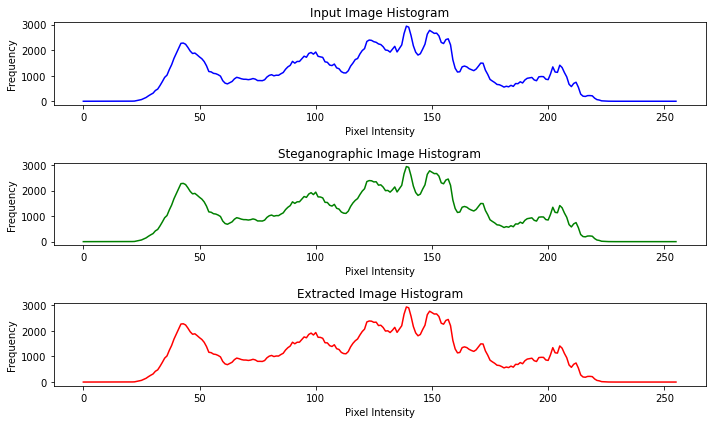

In [15]:
# Plot histogram of input image, embedded image and image obtained after message extraction.
import matplotlib.pyplot as plt

def plot_histograms(input_image, steganographic_image, extracted_image):
    # Calculate histograms for the input image, steganographic image, and extracted image
    input_hist = cv2.calcHist([input_image], [0], None, [256], [0, 256])
    steganographic_hist = cv2.calcHist([steganographic_image], [0], None, [256], [0, 256])
    extracted_hist = cv2.calcHist([extracted_image], [0], None, [256], [0, 256])

    # Plot histograms
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(input_hist, color='blue')
    plt.title('Input Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(3, 1, 2)
    plt.plot(steganographic_hist, color='green')
    plt.title('Steganographic Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(3, 1, 3)
    plt.plot(extracted_hist, color='red')
    plt.title('Extracted Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_histograms(image4, modified_image, modified_image)


In [17]:
#4. Implement histogram equalization on the grayscale image

def histogram_equalization(image):
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Plot original and equalized histograms


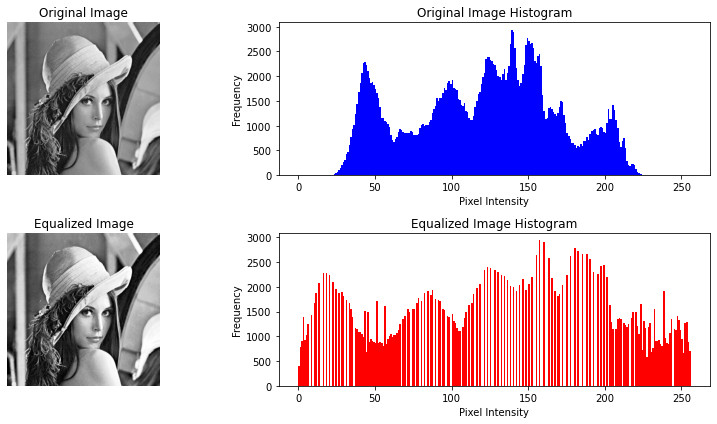

In [20]:
#Display both the original grayscale image and the histogram-equalized image side by side for comparison.
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.hist(image.flatten(), 256, [0, 256], color='blue')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), 256, [0, 256], color='red')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
#Display both the histogram of original grayscale image and the histogram of equalized image side by side for comparison.

